# Ising model

We employ the Metropolis algorithm to simulate the Ising Model, starting from a defined macroscopic state where the lattice is randomly split into spin-up and spin-down.


- The `compute_energy_change` function calculates the energy change ( $E_{flip}$) associated with flipping a spin at a particular lattice site
identified by 'i' and 'j': $E_{flip}= 2 J \sum_{\text {neighbors }} s_i s_j$, where $J$ represents the interaction strength between spins, $s_i$ and $s_j$ are the spin states of the current and neighboring sites, respectively.
- The `flip_spin` function flips the spin at site (i, j) in the lattice.
- The `ising_simulation` function initializes a lattice, sets up the simulation parameters, and performs the Monte Carlo simulation using the 
Metropolis algorithm. The function returns the final spin configuration and magnetization over time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_energy_change(grid, i, j, J=1):
    """Compute the energy change for flipping the spin at site (i, j)."""
    energy_change = 0
    for x, y in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:  # Neighboring positions
        if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
            energy_change += 2 * J * grid[i, j] * grid[x, y]
    return energy_change

def flip_spin(grid, i, j):
    """Flip the spin at site (i, j)."""
    grid[i, j] *= -1

def ising_simulation(grid_size, total_simulation_time, J=1, kT=1):
    """Simulates the Ising model, updating spins with the Metropolis algorithm, tracking magnetization over time."""
    grid = np.random.choice([-1, 1], size=(grid_size, grid_size))  # Initialize grid
    magnetization = [np.sum(grid) / grid.size]  # Initial magnetization

    for time_step in range(total_simulation_time):
        for _ in range(grid_size**2):  # Attempt as many flips as there are sites per time step
            i, j = np.random.randint(grid_size, size=2)  # Random site
            energy_change = compute_energy_change(grid, i, j, J)
            
            # Metropolis criterion
            if np.exp(-energy_change / kT) > np.random.rand():
                flip_spin(grid, i, j)

        magnetization.append(np.sum(grid) / grid.size)  # Update magnetization

    return grid, magnetization

### Running the simulation

We run the simulation for a given lattice size, total number of time steps, coupling constant, and temperature using the `ising_simulation` 
function. The final spin configuration and magnetization over time are stored in `final_grid` and `magnetization`.

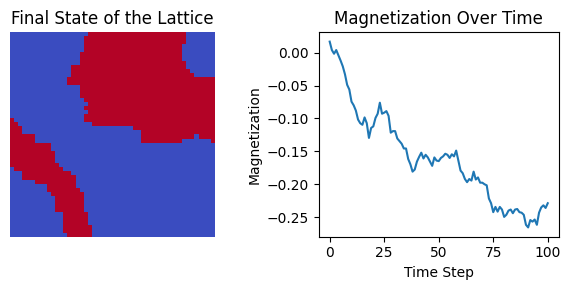

In [2]:

# Parameters
grid_size = 50  # Lattice size
total_simulation_time = 100  # Total number of time steps
J = 1  # Coupling constant
kT = 1  # Temperature in units of Boltzmann constant times temperature

# Run simulation
final_grid, magnetization = ising_simulation(grid_size, total_simulation_time, J, kT)

# Plotting final state and magnetization
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

# Final state
ax[0].imshow(final_grid, cmap='coolwarm')
ax[0].set_title('Final State of the Lattice')
ax[0].axis('off')

# Magnetization
ax[1].plot(magnetization)
ax[1].set_title('Magnetization Over Time')
ax[1].set_xlabel('Time Step')
ax[1].set_ylabel('Magnetization')

plt.tight_layout()
plt.show()

'plot_ising_states_and_magnetization' visualizes the behavior of an Ising model simulation over different temperatures, highlighting the phase transition from ordered to disordered states as temperature decreases. It takes a grid size, total simulation time, the coupling constant J, and a range of temperature values (kT) as inputs.

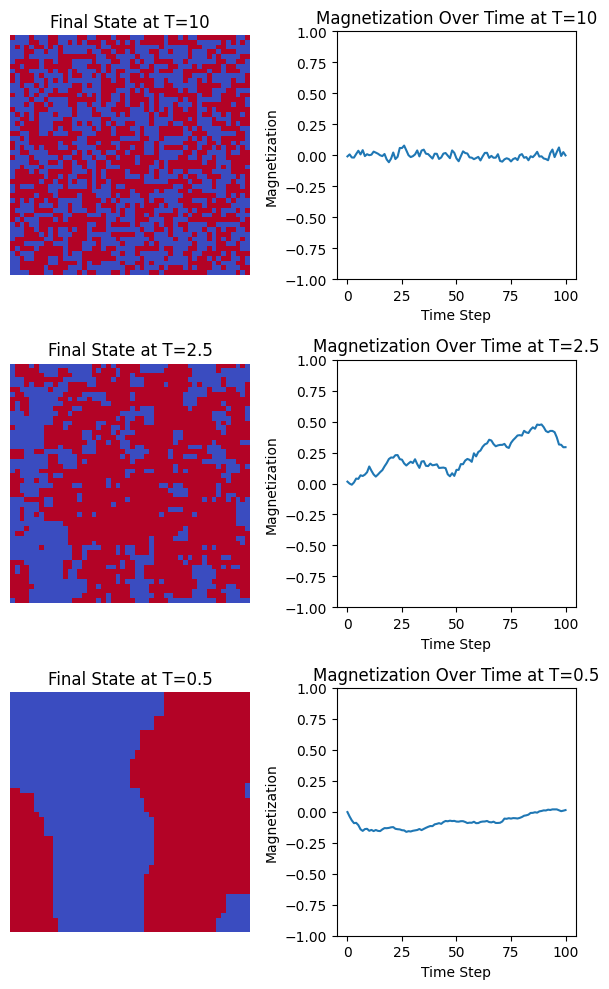

In [3]:
def plot_ising_states_and_magnetization(grid_size, total_simulation_time, J, kT_values):
    fig, axes = plt.subplots(len(kT_values), 2, figsize=(6, 10))  # Adjusted for 3 rows, 2 columns

    for i, kT in enumerate(kT_values):
        # Run simulation
        final_grid, magnetization = ising_simulation(grid_size, total_simulation_time, J, kT)

        # Plot final state
        ax0 = axes[i, 0]
        ax0.imshow(final_grid, cmap='coolwarm')
        ax0.set_title(f'Final State at T={kT}')
        ax0.axis('off')

        # Plot magnetization over time and set y-axis limits
        ax1 = axes[i, 1]
        ax1.plot(magnetization)
        ax1.set_ylim(-1, 1)  # Ensure y-axis is scaled between -1 and 1
        ax1.set_title(f'Magnetization Over Time at T={kT}')
        ax1.set_xlabel('Time Step')
        ax1.set_ylabel('Magnetization')

    plt.tight_layout()
    plt.savefig("figures/ising_model_plots.pdf")
    plt.show()

# Parameters
grid_size = 50  # Lattice size for quicker computation
total_simulation_time = 100  # Total number of time steps for each simulation
J = 1  # Coupling constant
# Representing low (ordered) to high (disordered) temperatures
kT_values = [10, 2.5, 0.5]

plot_ising_states_and_magnetization(grid_size, total_simulation_time, J, kT_values)
